## Final Project Submission

Please fill out:
* Student name: **Rich Caputo**
* Student pace: **self paced** 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://friendlydata.blog/


# Welcome!

In this project, we will be analyzing a dataset on housing in King's County. Our goal is to build a linear model for predicting the price of houses based on the other metrics provided.

First, we will import our relevant packages and load the data. Then, we will do some preliminary exploration of the data and make decisions on the best way to get our data ready for model building. Finally, we will build, test, and improve our linear model. Let's dive in!

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [125]:
# Load data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see that most of our data is numeric (either int64 or float64). This is good! However, we do see some issues jumping out at us. First, we see that sqft_basement is cast as an object. Let's see what's going on there.

In [127]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
248.0         1
792.0         1
2250.0        1
1920.0        1
2730.0        1
4130.0        1
2190.0        1
1008.0        1
768.0         1
2500.0        1
861.0         1
2400.0        1
475.0         1
1770.0        1
946.0         1
2130.0        1
784.0         1
704.0         1
2120.0        1
1990.0        1
2810.0        1
506.0         1
1960.0        1
2600.0        1
2580.0        1
266.0         1
3260.0        1
1281.0        1
2240.0        1
176.0         1
Name: sqft_basement, Len

Aha, there is a value labeled as `?` appearing 454 times. We need to fix this. Since the vast majority of this feature is represented as `0`, and only a small portion is represented as `?`, it is probably a good idea to cast `?` to `0`. 

In [128]:
df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
df.sqft_basement = df.sqft_basement.astype('float64')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Next, we need to investigate columns with `NaN` values.

In [130]:
df.yr_renovated.isna().sum()

3842

In [131]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [132]:
df.waterfront.isna().sum()

2376

In [133]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

For both of these columns, `0.0` is very dominant. Similarly as before, we will cast `NaN` values as `0.0`. 

In [134]:
df.waterfront.fillna(0, inplace=True)
df.yr_renovated.fillna(0, inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


There are still a small number of rows with NaN view values. Let's examine this.

In [136]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Again, `0.0` is a clear winner! We will cast `NaN` as `0.0` here too. 

In [137]:
df.view.fillna(0, inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Okay, great, now each column has the same number of non-null entries and has an appropriate dtype (except for date, but we will fix that momentarily)! Our next step is to clean the data further so that it is model-ready. First, we will drop the id column since we won't need it for modeling purposes.

In [139]:
df.drop(['id'], axis=1, inplace=True)

Next, we need to figure out what to do with our date column. If sales go back far enough in time, we may see inflation / market fluctuations play an effect in our model. Let's examine this.

In [140]:
# Cast date to datetime format
df.date = pd.to_datetime(df.date)

In [141]:
df.date.max() - df.date.min()

Timedelta('390 days 00:00:00')

We see that our dates span roughly a year. We will assume that this timeframe is not long enough to have a significant affect and will thus drop the date column.

In [142]:
df.drop(['date'], axis=1, inplace=True)

We still have some columns that are not model ready. In particular, we need to do something about our location data so that a  linear model will perform well. We will use binning so that houses in a similar area are binned together. First, let's examine the zipcode column.

In [143]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Okay, there are 70 different zip codes. It is obvious that prices will not have a linear relationship with simply a zip code number. However, geographical location will certainly have an influence on housing prices. It may be easier to work with the provided lattitude and longitude columns. Let's plot their relationship with price. We will use a diverging colorbar to make it clear when an area is more expensive vs. less expensive

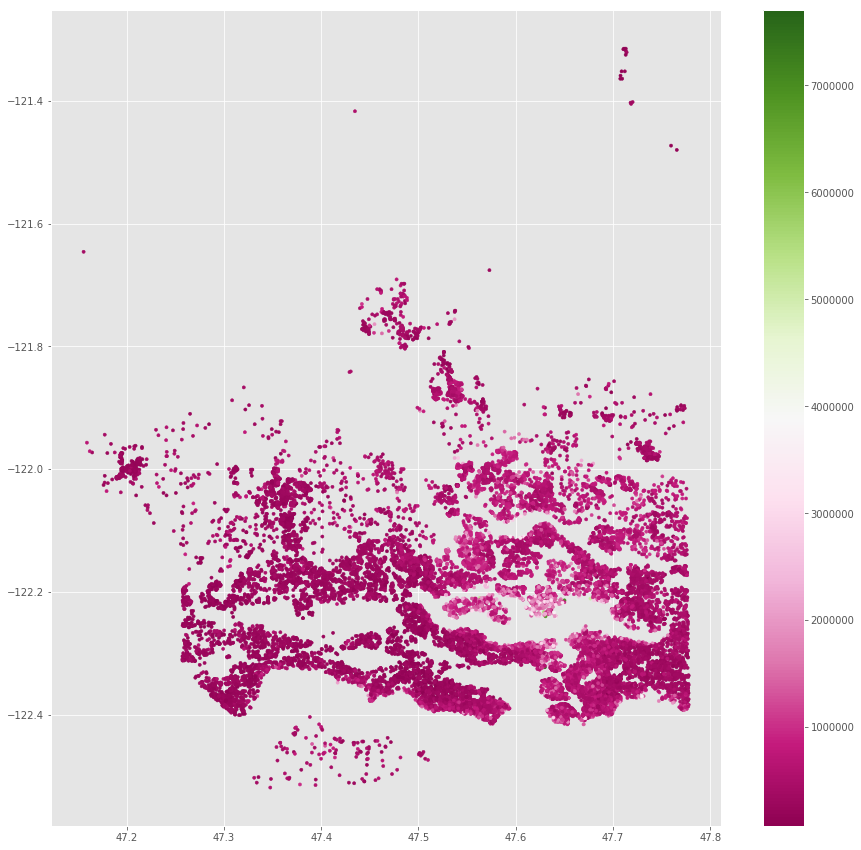

In [144]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))
plt.scatter(df.lat, df.long, c=df.price, s=10, cmap='PiYG')
plt.colorbar()

This plot shows that GPS location has a clear affect on price. Additionally, it captures more information than the zipcode column since it is more granular. However, we still need to figure out a creative way to make this feature usable for a linear model. 

One way to do this is binning, where bins of GPS locations are represented using one-hot encoding. But, doing this using lat and long separately will only bin the data rectangularly. This would lose a lot of predictive power and lead to model bias. Instead, we are going to use a fancy tool called spectral clustering to capture geographical clusters in our data. This will allow us to effectively bin our geographical data and retain a lot of predictive power.



In [145]:
X = df[['lat', 'long']]

In [151]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


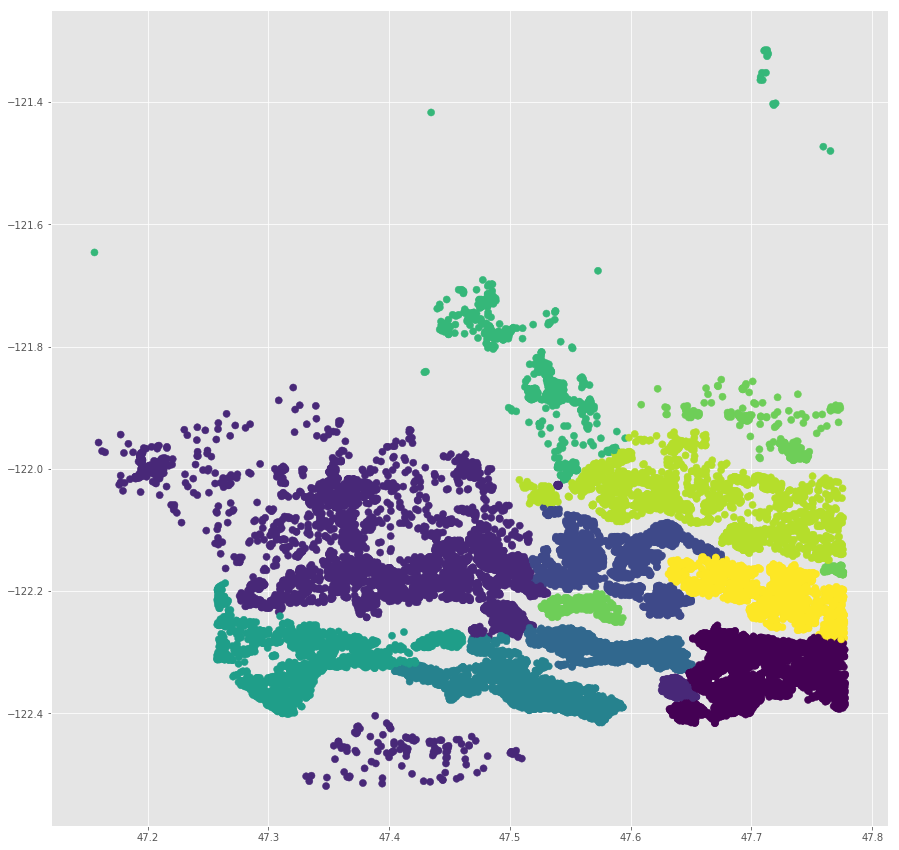

In [152]:
plt.figure(figsize=(15, 15))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels,
            s=50, cmap='viridis');

Wow, that did a great job capturing the geographical nuances of our data. Using these labels, we will create new columns to represent geographical location based on our cluster bins. Of course, this won't perfectly capture all the information provided, but it will definitely allow us to build a linear relationship between price and location. Let's take a look at what the bin labels look like.

In [153]:
labels[:10]

array([1, 0, 9, 4, 8, 8, 5, 5, 4, 1])

We see that each label represents numerically the cluster that data point belongs to. This can be easily fit into our dataset!

In [154]:
df['location'] = labels

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location         21597 non-null int32
dtypes: float64(9), int32(1), int64(10)
memory usage: 3.2 MB


In [156]:
df.location = df.location.astype('category')
df = pd.get_dummies(df)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8

Boom! That's the power of one-hot encoding. We just dealt with a problematic subset of our data and made it look easy. We can now drop our lat, long, and zipcode columns.

In [158]:
df.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)

We are almost done cleaning the data. Before we figure out which transformations / normalizations we need to do, we need to deal with the columns yr_built and yr_renovated. As we saw before, a vast majority of houses were not rennovated. Thus, it will be much easier to represent yr_rennovated as a binary variable: 1 if rennovated, 0 if not rennovated. Although this is a simplification, it will be much better for modeling purposes.

In [159]:
df['renovated'] = (df.yr_renovated > 0).astype('uint8')
df.drop(['yr_renovated'], axis=1, inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8
location_4       21597 non-null uint8
location_5       21597 non-null uint8
location_6       21597 non-null uint8
location_7       21597 non-null uint8
locat

In [161]:
df.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64

Now, we need to figure out what to do with yr_built. Let's visualize it's relationship with price.

Text(0, 0.5, 'Price ($)')

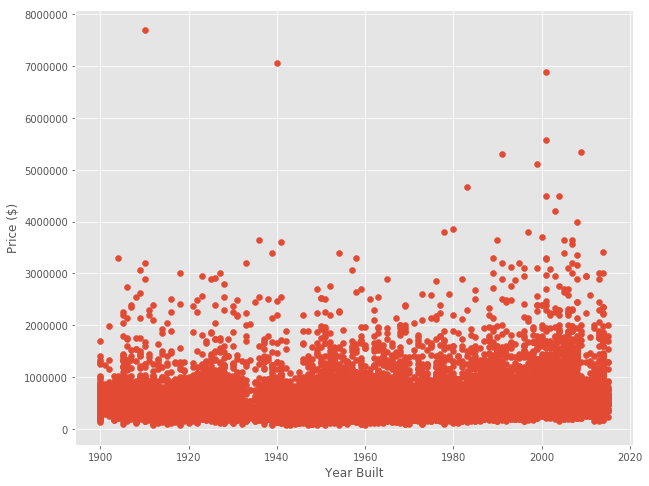

In [162]:
plt.figure(figsize=(10, 8))
plt.scatter(df.yr_built, df.price)
plt.xlabel('Year Built')
plt.ylabel('Price ($)')

It's tough to see the relationship here. Instead, let's visualize the mean home price per year.

Text(0, 0.5, 'Mean Price ($)')

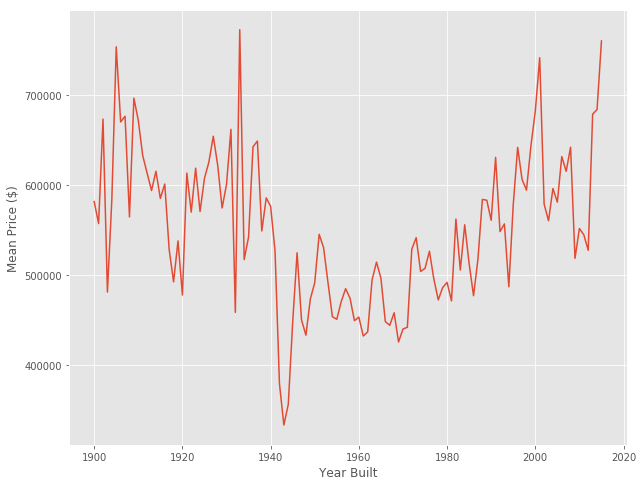

In [163]:
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price ($)')

Despite the fact that there is a lot of noise and seasonality in this plot, it seems that price does contain a time trend (not surprising), but it is not entirely linear. Thus, it seems best to use binning instead.

In [164]:
df.yr_built.min(), df.yr_built.max()

(1900, 2015)

We will bin according to decade for simplicity. This should capture enough of the trend without being too exposed to noise. 

In [165]:
bins = list(range(1899, 2020, 10))
# use pd.cut
bins_yr = pd.cut(df.yr_built, bins)

In [166]:
# Sanity check
bins_yr.isna().sum()

0

In [167]:
df['yr_built'] = bins_yr.astype('category')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null category
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8
location_4       21597 non-null uint8
location_5       21597 non-null uint8
location_6       21597 non-null uint8
location_7       21597 non-null uint8
lo

In [169]:
df = pd.get_dummies(df)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 38 columns):
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null int64
sqft_lot                 21597 non-null int64
floors                   21597 non-null float64
waterfront               21597 non-null float64
view                     21597 non-null float64
condition                21597 non-null int64
grade                    21597 non-null int64
sqft_above               21597 non-null int64
sqft_basement            21597 non-null float64
sqft_living15            21597 non-null int64
sqft_lot15               21597 non-null int64
location_0               21597 non-null uint8
location_1               21597 non-null uint8
location_2               21597 non-null uint8
location_3               21597 non-null uint8
location_4               21597 non-null uint8
locat

Now that's a clean dataset! Okay, all are columns are exactly in the right format. The last step is to transform the data to make it as 'normal' as possible. Let's do some exploratory statistical analysis. We can safely ignore our categorical variables for this phase.

In [171]:
df.iloc[:, :14].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2E2B372B0>,
      dtype=object)

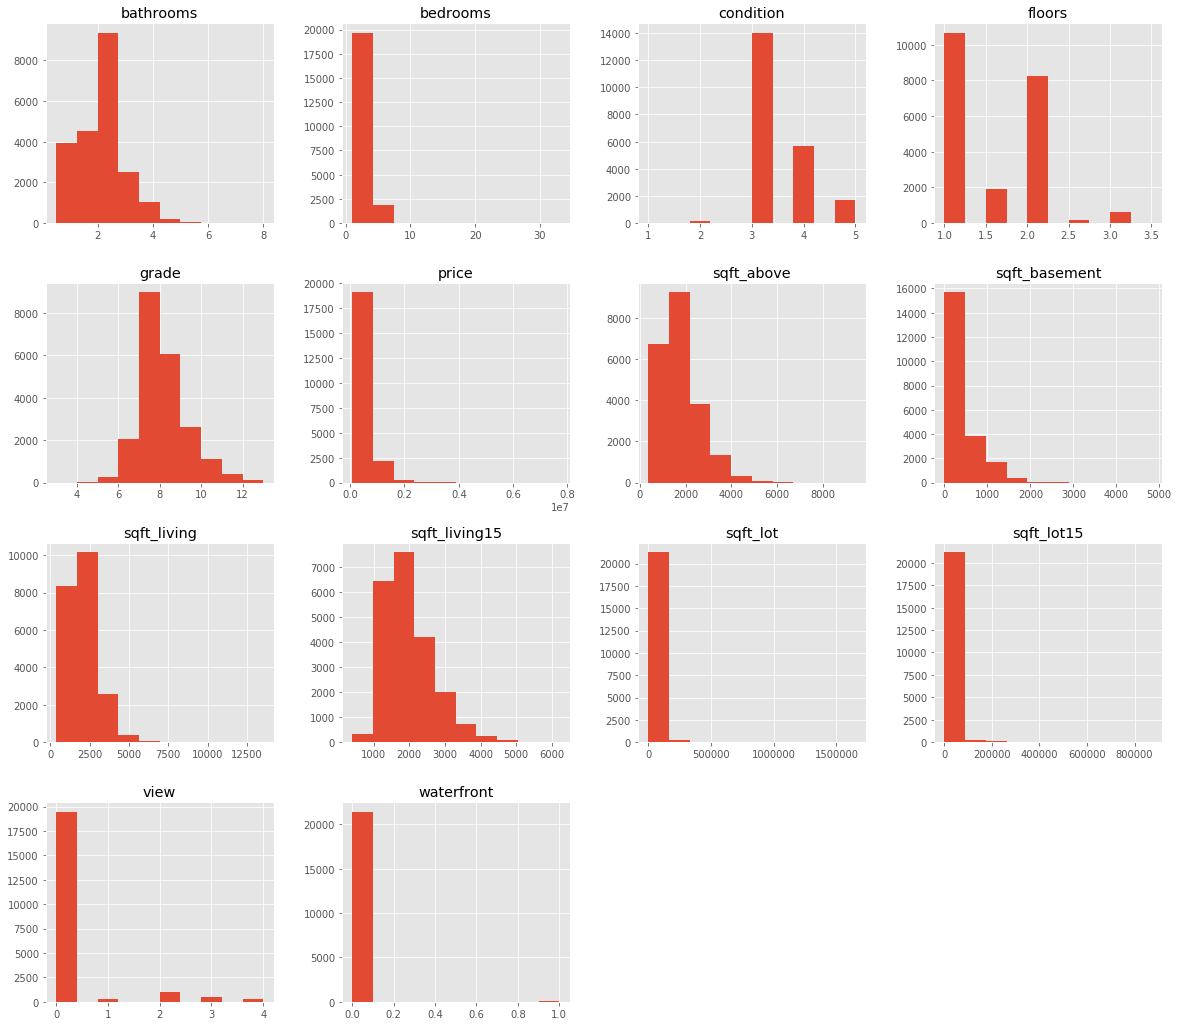

In [172]:
df_num.hist(figsize=(20, 18))

Some things immediately jump out at us. First, we see that many columns are negatively skewed. Furthermore, we see that our view variable is needlessly complex. Let's transform our view variable to a binary (i.e. 1 for view, 0 for non-view). Additionally, we will log transform our sqft variables. Finally, we need to log-transform our price variable.

In [173]:
df['view'] = (df['view'] > 0).astype('uint8')

In [174]:
df[[x for x in df.columns if x.startswith('sqft')]] = np.log(df[[x for x in df.columns if x.startswith('sqft')]])

In [175]:
# Corrects np.log(0)
df[np.isneginf(df)]=0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2E3C94B38>,
      dtype=object)

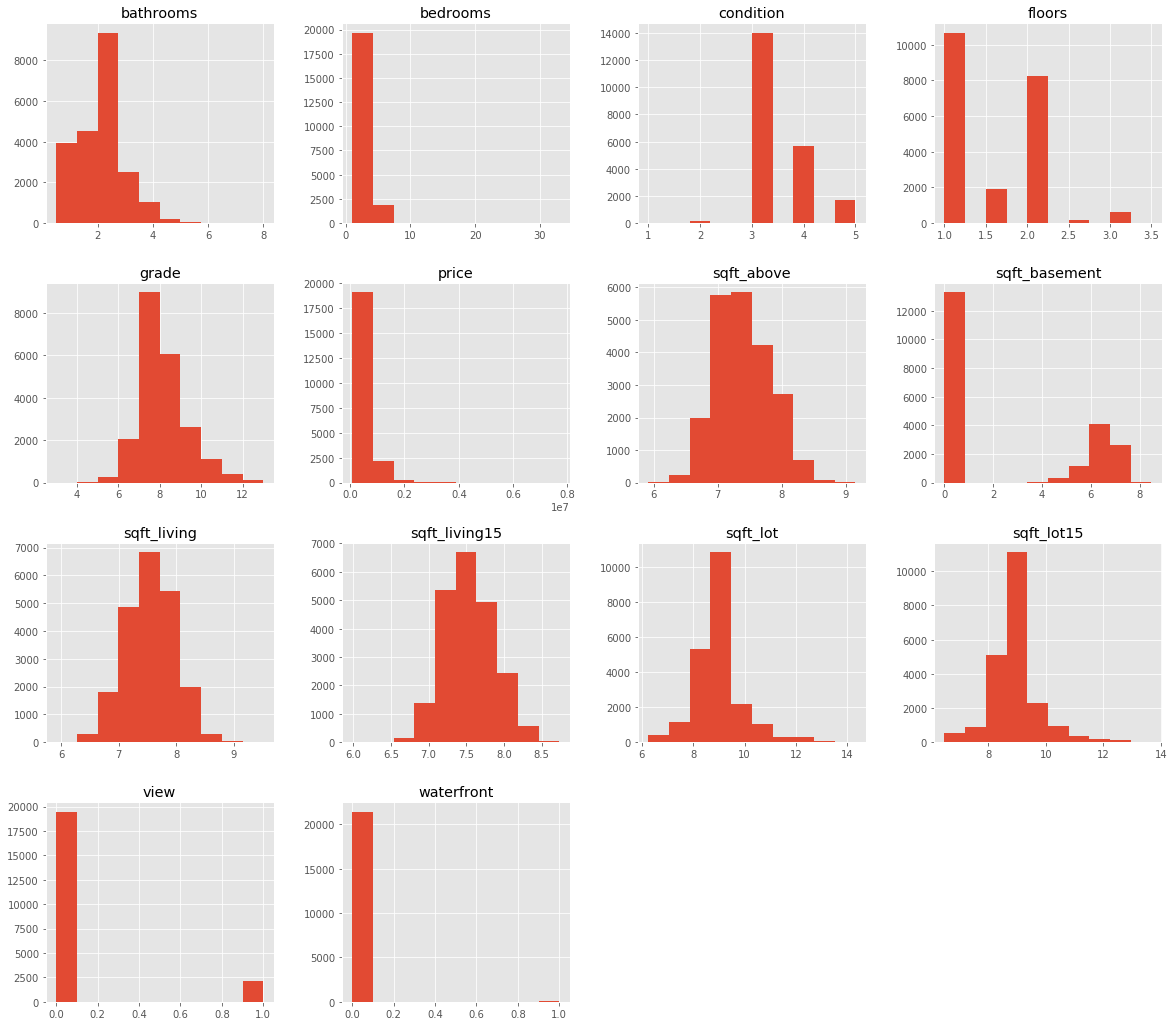

In [176]:
df.iloc[:, :14].hist(figsize=(20, 18))

That already looks much better! Let's also log-transform price.

In [177]:
df[['price']] = np.log(df[['price']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2E29C0E80>,
      dtype=object)

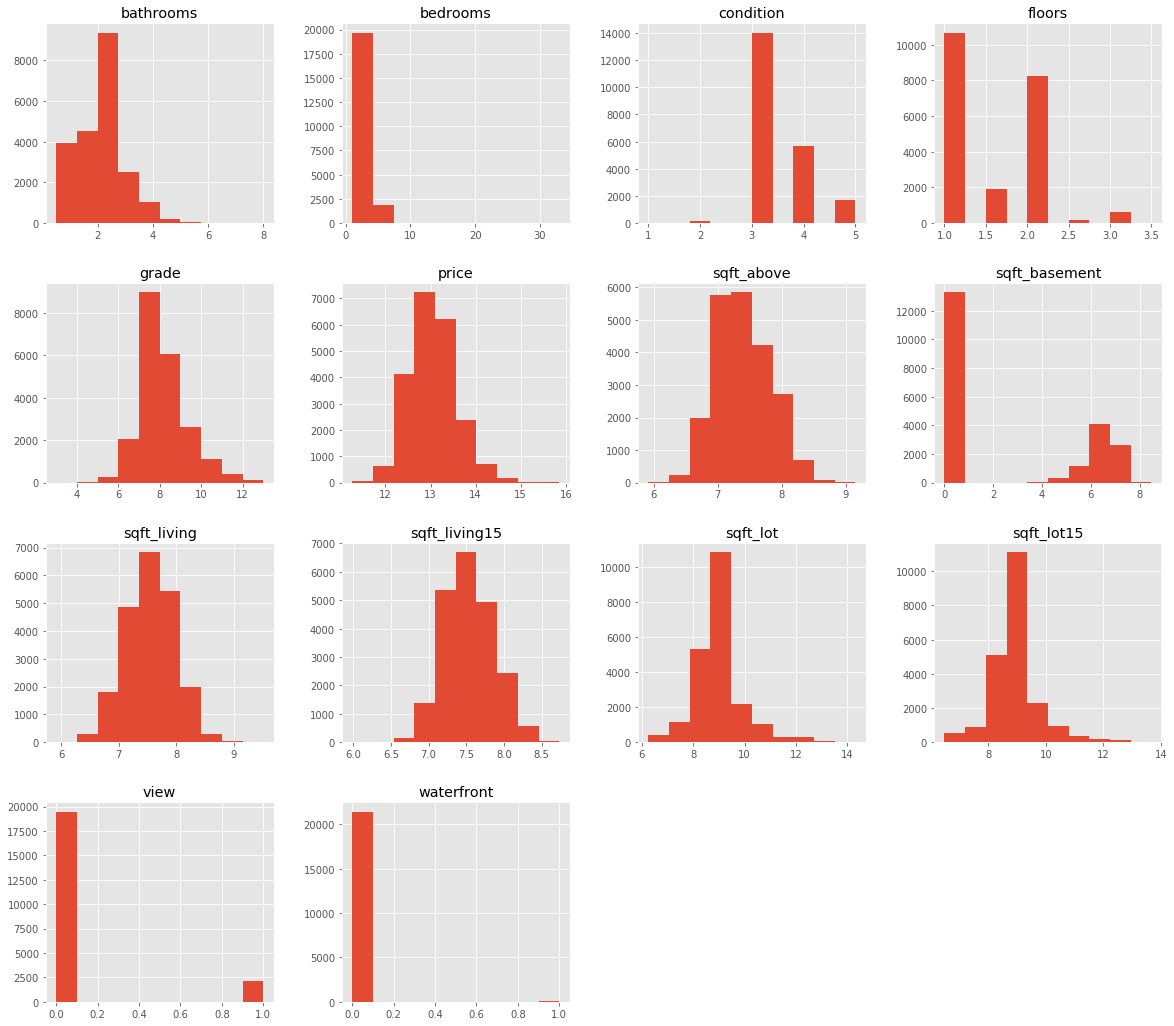

In [178]:
df.iloc[:, :14].hist(figsize=(20, 18))

An issue to notice is that a large number of sqft_basement labels are set to zero. To combat this, we will do some feature engineering and set sqft_above and sqft_below to a single summed variable. In fact, that is already represented by sqft_living. Then, we will create a new binary variable that indicates if the housing unit has a basement or not.

In [180]:
df['basement'] = (df.sqft_basement > 0).astype('uint8')

In [181]:
df.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 37 columns):
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null float64
sqft_lot                 21597 non-null float64
floors                   21597 non-null float64
waterfront               21597 non-null float64
view                     21597 non-null uint8
condition                21597 non-null int64
grade                    21597 non-null int64
sqft_living15            21597 non-null float64
sqft_lot15               21597 non-null float64
location_0               21597 non-null uint8
location_1               21597 non-null uint8
location_2               21597 non-null uint8
location_3               21597 non-null uint8
location_4               21597 non-null uint8
location_5               21597 non-null uint8
location_6               21597 non-null uint8
l

We now need to figure out what to do about the bedrooms and bathrooms features. Let's examine them using boxplots.

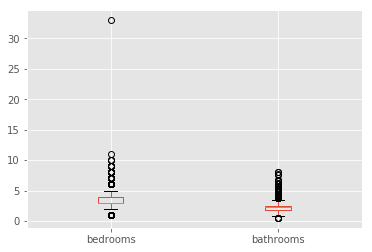

In [186]:
df[['bedrooms', 'bathrooms']].boxplot()

The problem with these variables is that there are massive outliers! Let's examine the numbers.

In [187]:
df[['bedrooms', 'bathrooms']].describe()

,bedrooms,bathrooms
count,21597.000000,21597.000000
mean,3.373200,2.115826
std,0.926299,0.768984
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


Wow, there's a house with 33 bedrooms. Let's take a look at that entry.

In [188]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,"yr_built_(1939, 1949]","yr_built_(1949, 1959]","yr_built_(1959, 1969]","yr_built_(1969, 1979]","yr_built_(1979, 1989]","yr_built_(1989, 1999]","yr_built_(1999, 2009]","yr_built_(2009, 2019]","yr_built_(2019, 2029]",basement
15856,13.369223,33,1.75,7.390181,8.699515,1.0,0.0,0,5,7,...,1,0,0,0,0,0,0,0,0,1


Hmm.. 33 bedrooms but only 1.75 bathrooms? Something doesn't seem right. Maybe there is an error in our data? Nonetheless, we have plenty of data already, so there won't be much harm in dropping this row.

In [192]:
df.drop(df[df['bedrooms'] == 33].index, axis=0, inplace=True)

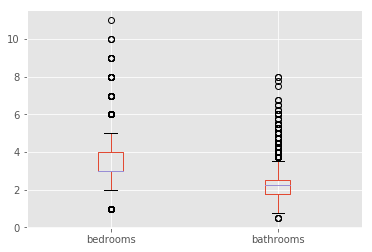

In [193]:
df[['bedrooms', 'bathrooms']].boxplot()

Okay, that's more reasonable. It is difficult to tell if a log transform for these two variables is appropriate. For one thing we don't want the model to overpredict price, but on the other hand, we want to make sure our model performs well on every data point. For now, we will leave these variables as is and make changes later on if we need to.

Let's now try to find any multicolinearity in our data. We can use a seaborn heatmap for this.

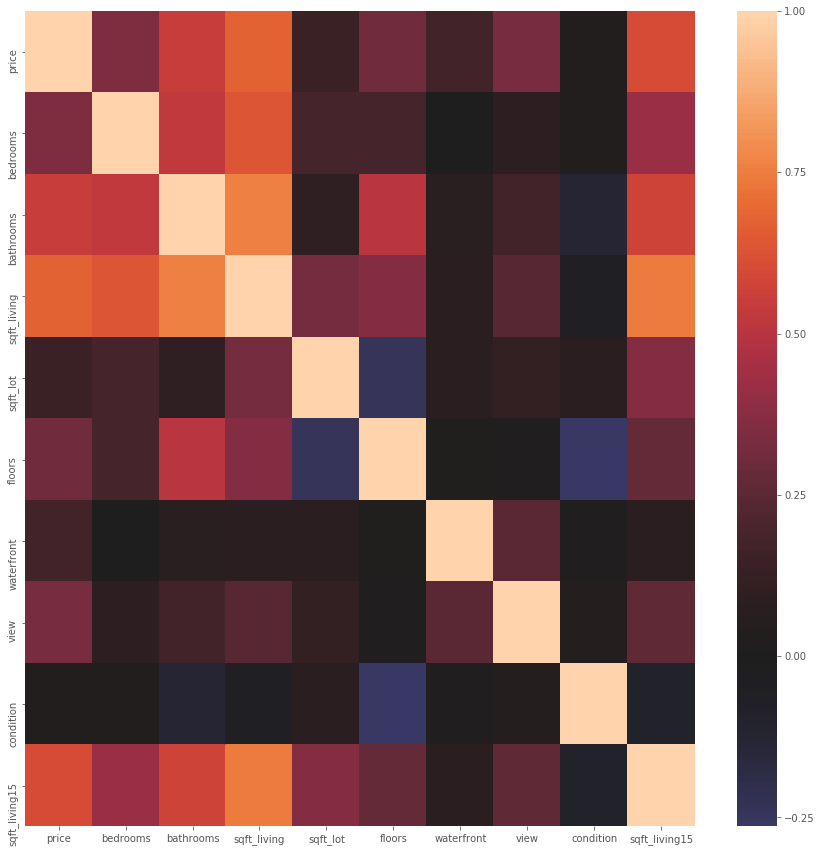

In [199]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.iloc[:, :10].corr(), center=0);

In [197]:
df.iloc[:, :10].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
price,1.000000,0.350871,0.551270,0.674820,0.138271,0.310665,0.170724,0.329043,0.038855,0.703747
bedrooms,0.350871,1.000000,0.527870,0.637670,0.189953,0.183707,-0.002054,0.081678,0.023440,0.366174
bathrooms,0.551270,0.527870,1.000000,0.762133,0.100617,0.502574,0.063628,0.175879,-0.126443,0.665834
sqft_living,0.674820,0.637670,0.762133,1.000000,0.325979,0.367556,0.078898,0.237822,-0.049584,0.743036
sqft_lot,0.138271,0.189953,0.100617,0.325979,1.000000,-0.237479,0.072339,0.112091,0.073741,0.184316
floors,0.310665,0.183707,0.502574,0.367556,-0.237479,1.000000,0.020794,0.016297,-0.264013,0.458783
waterfront,0.170724,-0.002054,0.063628,0.078898,0.072339,0.020794,1.000000,0.248683,0.016659,0.082817
view,0.329043,0.081678,0.175879,0.237822,0.112091,0.016297,0.248683,1.000000,0.046879,0.235245
condition,0.038855,0.023440,-0.126443,-0.049584,0.073741,-0.264013,0.016659,0.046879,1.000000,-0.146854
grade,0.703747,0.366174,0.665834,0.743036,0.184316,0.458783,0.082817,0.235245,-0.146854,1.000000


The grade column seems highly correlated with other variables. It is probably a redundant variable, so we will drop it.

In [198]:
df.drop(['grade', ''], axis=1, inplace=True)

Although there are other correlated features, we will keep them, since they seem to have high predictive capabilities. Okay, we are ready to start testing some models! First, lets build a linear model using statsmodels so that we can observe directly how the model is doing.

In [210]:
X, y = df[[x for x in df.columns if x != 'price']], df[['price']]
X = X.drop(['yr_built_(2019, 2029]'], axis=1)

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [214]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [215]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1658.
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:16:31   Log-Likelihood:                -1238.3
No. Observations:               17276   AIC:                             2543.
Df Residuals:                   17243   BIC:                             2799.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.4731      0.057     95.507      0.000       5.361       5.585
bedrooms                 -0.0480      0.003    -15.920      0.000      -0.054      -0.042
bathrooms                 0.0808      0.005     17.201      0.000       0.072       0.090
sqft_living               0.5331      0.011     50.067      0.000       0.512       0.554
sqft_lot                  0.0346      0.006      5.935      0.000       0.023       0.046
floors                    0.0577      0.006      9.775      0.000       0.046       0.069
waterfront                0.5099      0.025     20.166      0.000       0.460       0.559
view                      0.2046      0.007     27.362      0.000       0.190       0.219
condition                 0.0559      0.003     16.233      0.000       0.049       0.063
sqft_living15             0.3013      0.010     29.584      0.000       0.281       0.321
sqft_lot15               -0.0319      0.006     -5.058      0.000      -0.044      -0.020
location_0                0.7146      0.007    101.484      0.000       0.701       0.728
location_1                0.2569      0.007     35.891      0.000       0.243       0.271
location_2                0.8303      0.010     85.995      0.000       0.811       0.849
location_3                0.6456      0.009     73.275      0.000       0.628       0.663
location_4                0.4587      0.008     60.107      0.000       0.444       0.474
location_5                0.1053      0.009     12.079      0.000       0.088       0.122
location_6                0.4680      0.012     40.672      0.000       0.445       0.491
location_7                0.6655      0.013     52.222      0.000       0.641       0.690
location_8                0.6599      0.010     67.503      0.000       0.641       0.679
location_9                0.6683      0.009     72.687      0.000       0.650       0.686
renovated                 0.0925      0.012      8.002      0.000       0.070       0.115
yr_built_(1899, 1909]     0.6473      0.012     52.482      0.000       0.623       0.671
yr_built_(1909, 1919]     0.5940      0.011     52.826      0.000       0.572       0.616
yr_built_(1919, 1929]     0.5989      0.010     60.907      0.000       0.580       0.618
yr_built_(1929, 1939]     0.4991      0.013     38.115      0.000       0.473       0.525
yr_built_(1939, 1949]     0.4647      0.009     53.530      0.000       0.448       0.482
yr_built_(1949, 1959]     0.4191      0.008     52.269      0.000       0.403       0.435
yr_built_(1959, 1969]     0.3651      0.008     47.644      0.000       0.350       0.380
yr_built_(1969, 1979]     0.3298      0.008     41.584      0.000       0.314       0.345
yr_built_(1979, 1989]     0.3613      0.008     45.013      0.000       0.346       0.377
yr_built_(1989, 1999]  

It seems that the p-value of our basement column is very high. Let's drop this column and fit another model.

In [216]:
X.drop('basement', axis=1, inplace=True)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [219]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1706.
Date:                Mon, 04 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:18:35   Log-Likelihood:                -1241.6
No. Observations:               17276   AIC:                             2547.
Df Residuals:                   17244   BIC:                             2795.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.4562      0.057     95.724      0.000       5.344       5.568
bedrooms                 -0.0500      0.003    -16.608      0.000      -0.056      -0.044
bathrooms                 0.0821      0.005     17.402      0.000       0.073       0.091
sqft_living               0.5346      0.010     52.708      0.000       0.515       0.554
sqft_lot                  0.0323      0.006      5.606      0.000       0.021       0.044
floors                    0.0593      0.005     10.795      0.000       0.049       0.070
waterfront                0.5074      0.025     20.365      0.000       0.459       0.556
view                      0.2050      0.007     27.579      0.000       0.190       0.220
condition                 0.0578      0.003     16.677      0.000       0.051       0.065
sqft_living15             0.3028      0.010     29.803      0.000       0.283       0.323
sqft_lot15               -0.0304      0.006     -4.814      0.000      -0.043      -0.018
location_0                0.7125      0.007    101.109      0.000       0.699       0.726
location_1                0.2569      0.007     36.275      0.000       0.243       0.271
location_2                0.8284      0.010     85.983      0.000       0.810       0.847
location_3                0.6557      0.009     74.120      0.000       0.638       0.673
location_4                0.4521      0.008     59.704      0.000       0.437       0.467
location_5                0.1025      0.009     11.795      0.000       0.085       0.120
location_6                0.4655      0.011     41.039      0.000       0.443       0.488
location_7                0.6596      0.013     51.849      0.000       0.635       0.684
location_8                0.6577      0.010     68.509      0.000       0.639       0.676
location_9                0.6654      0.009     72.822      0.000       0.647       0.683
renovated                 0.0804      0.011      7.038      0.000       0.058       0.103
yr_built_(1899, 1909]     0.6284      0.012     51.115      0.000       0.604       0.653
yr_built_(1909, 1919]     0.5825      0.011     52.288      0.000       0.561       0.604
yr_built_(1919, 1929]     0.6028      0.010     61.407      0.000       0.584       0.622
yr_built_(1929, 1939]     0.5144      0.013     38.813      0.000       0.488       0.540
yr_built_(1939, 1949]     0.4552      0.009     52.969      0.000       0.438       0.472
yr_built_(1949, 1959]     0.4189      0.008     52.246      0.000       0.403       0.435
yr_built_(1959, 1969]     0.3728      0.008     48.580      0.000       0.358       0.388
yr_built_(1969, 1979]     0.3326      0.008     41.521      0.000       0.317       0.348
yr_built_(1979, 1989]     0.3601      0.008     44.670      0.000       0.344       0.376
yr_built_(1989, 1999]  

Next, we will use cross-validation to get a better idea of how the model is perfmorming.

In [224]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

cv_5_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=20, scoring="neg_mean_squared_error"))

In [225]:
cv_5_results

-0.06787253422890166

In [226]:
cv_10_results

-0.06790884770107322

In [227]:
cv_20_results

-0.06791333609063246

The model seemst to be performing well upon using cross-validation! Let's now train the model and see how it performs on the test set.

In [228]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [229]:
print(mean_squared_error(y_train, y_hat_train))
print(mean_squared_error(y_test, y_hat_test))

0.06760056921525331
0.06834787860324797


In [232]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_hat_train))
print(r2_score(y_test, y_hat_test))

0.7541618218301536
0.7613113390406612


Interestingly, the model performs better on the test set than the training set! Let's now see it in action.

In [234]:
y_test = np.exp(y_test)
y_hat_test = np.exp(y_hat_test)

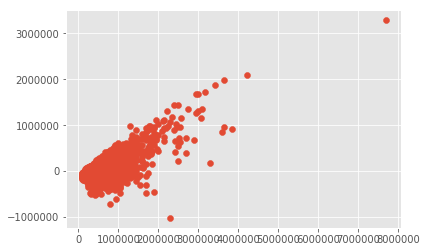

In [244]:
plt.scatter(y_test, y_test-y_hat_test)